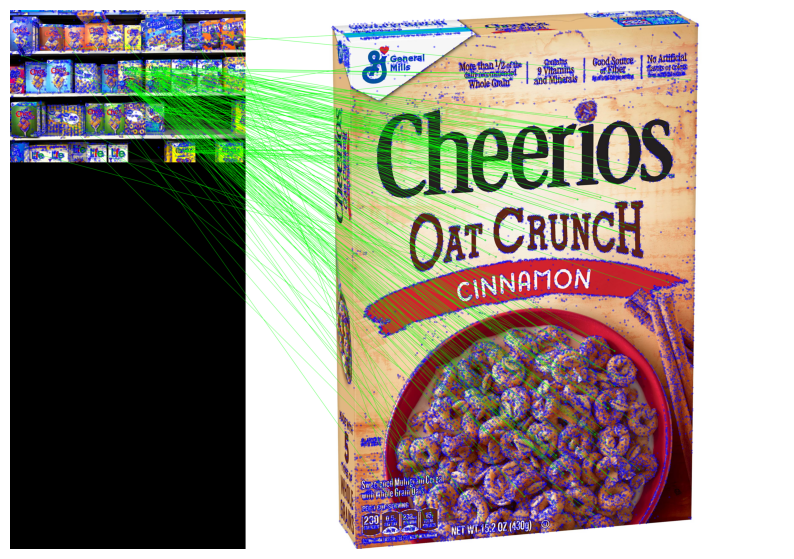

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to read images
def load_images(image_path, template_path):
    image = cv.imread(image_path)
    template = cv.imread(template_path)
    return image, template

# Function to detect SIFT features
def detect_sift_features(image):
    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Function to match features using FLANN
def match_features(des1, des2):
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    return matches

# Function to apply Lowe's ratio test
def apply_ratio_test(matches):
    matchesMask = [[0, 0] for i in range(len(matches))]
    for i, (m, n) in enumerate(matches):
        if m.distance < 0.7 * n.distance:
            matchesMask[i] = [1, 0]
    return matchesMask

# Function to draw matches
def draw_matches(image, kp1, template, kp2, matches, matchesMask):
    draw_params = dict(matchColor=(0, 255, 0),
                       singlePointColor=(255, 0, 0),
                       matchesMask=matchesMask,
                       flags=cv.DrawMatchesFlags_DEFAULT)
    result_img = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **draw_params)
    return result_img


image_path = '/content/store_shelf.png'
template_path = '/content/oat_crunch.jpg'

# Load images
image, template = load_images(image_path, template_path)

# Detect SIFT features
kp1, des1 = detect_sift_features(image)
kp2, des2 = detect_sift_features(template)

# Match features using FLANN
matches = match_features(des1, des2)

# Apply Lowe's ratio test
matchesMask = apply_ratio_test(matches)

# Draw matches
result_img = draw_matches(image, kp1, template, kp2, matches, matchesMask)

# Display result
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


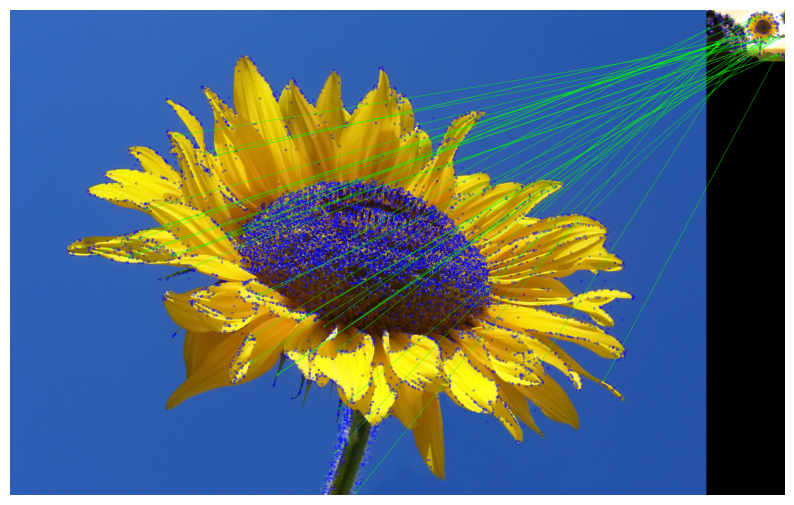

In [5]:
image_path = '/content/Sunflower_from_Silesia2.jpg'
template_path = '/content/images.jpeg'

# Load images
image, template = load_images(image_path, template_path)

# Detect SIFT features
kp1, des1 = detect_sift_features(image)
kp2, des2 = detect_sift_features(template)

# Match features using FLANN
matches = match_features(des1, des2)

# Apply Lowe's ratio test
matchesMask = apply_ratio_test(matches)

# Draw matches
result_img = draw_matches(image, kp1, template, kp2, matches, matchesMask)

# Display result
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()